 # Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Data

Text(0, 0.5, 'Humidity')

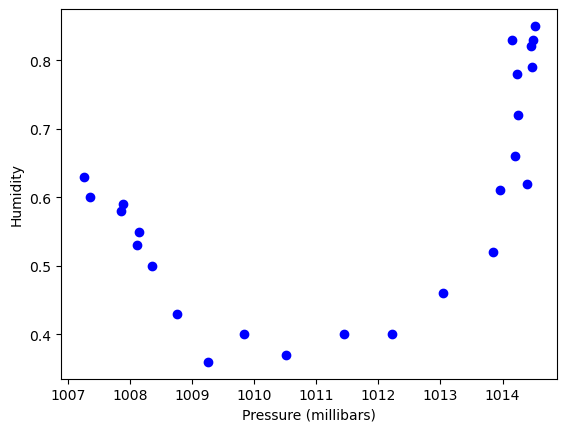

In [26]:

df = pd.read_csv("WeatherDataP.csv")

df.head()

X = df[["Pressure (millibars)"]]
Y = df.Humidity

# Produce a scatter graph of Humidity against Pressure
plt.scatter(X, Y, c = "blue")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

#X = 4 * np.random.rand(100, 1) - 2
#Y = 4 + 2 * X + 5 * X**2 + np.random.rand(100, 1)

#poly_features = PolynomialFeatures(degree=2, include_bias=False)
#X_poly = poly_features.fit_transform(X)

#plt.scatter(X,Y)



# Model

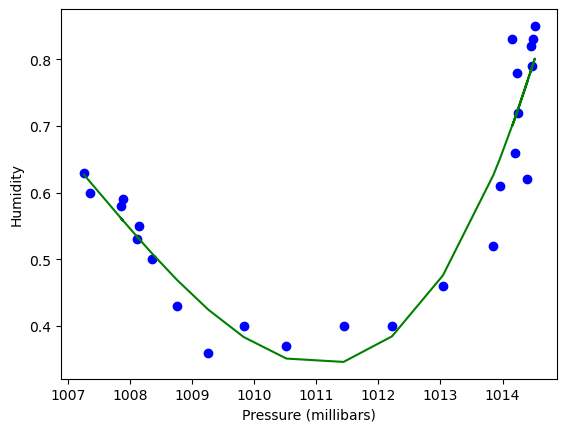

In [65]:
#Try fitting model at different degree
pre_process = PolynomialFeatures(degree=3)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)

pr_model = LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, Y)

# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)


# Plot our model on our data
plt.scatter(X, Y, c = "blue")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, y_pred, c="green")


# Model Evaluation

In [66]:
#Should be close to 0 (while not overfitting the data)
mean_squared_error(Y, y_pred) 
#Should be close to 1 (while not overfitting the data)
rmse = np.sqrt(mean_squared_error(Y,y_pred))
r2 = r2_score(Y,y_pred)
print(r2)
print(rmse)

0.8777508310777791
0.05446978969981213


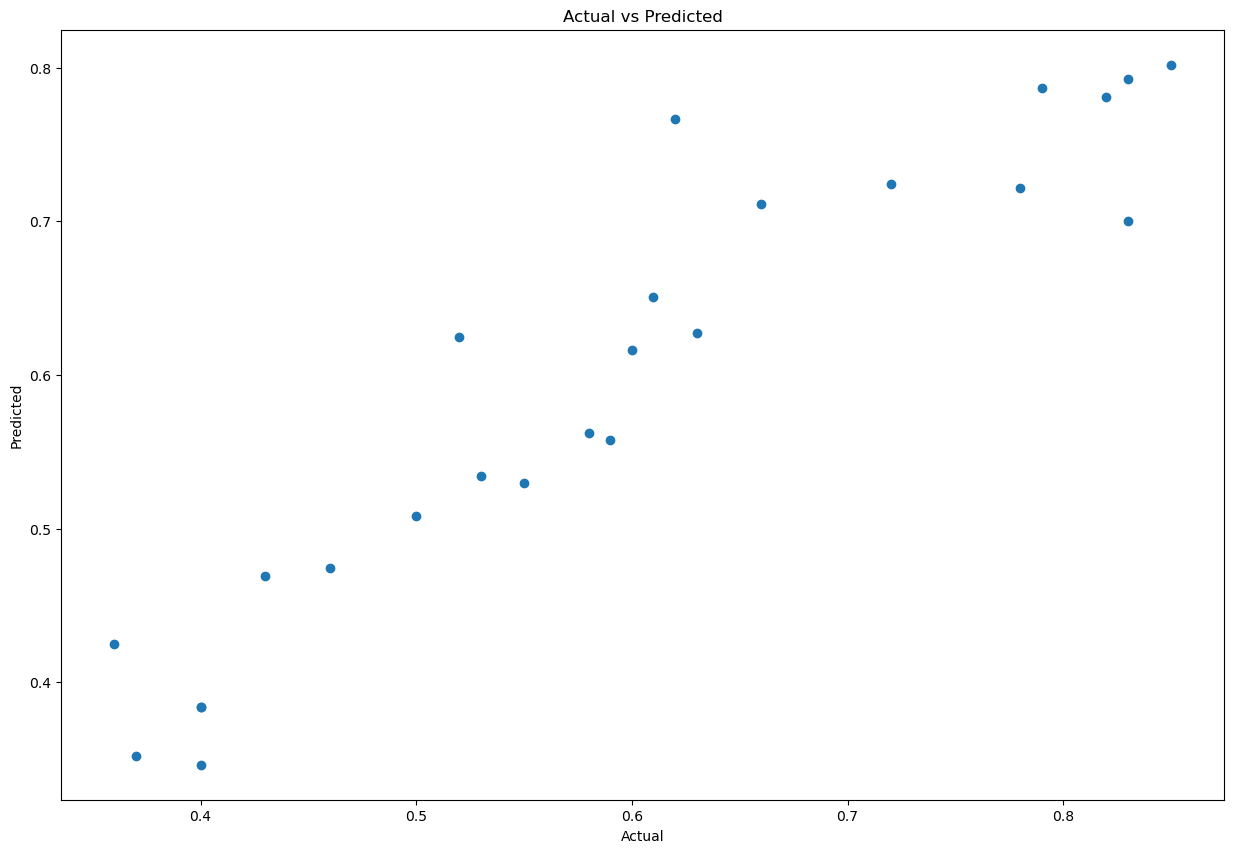

In [61]:
plt.figure(figsize=(15,10))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.scatter(Y,y_pred)

In [62]:
pre_df = pd.DataFrame({'Actual Value':Y, 'Predicted Value':y_pred, 'Difference':Y-y_pred})
pre_df

,Actual Value,Predicted Value,Difference
0,0.62,0.766366,-0.146366
1,0.66,0.710963,-0.050963
2,0.79,0.786859,0.003141
3,0.82,0.780945,0.039055
4,0.83,0.792820,0.037180
5,0.85,0.801852,0.048148
6,0.83,0.700432,0.129568
7,0.78,0.721675,0.058325
8,0.72,0.724382,-0.004382
9,0.61,0.650461,-0.040461


# New Data

In [70]:
y_new = pr_model.predict(pre_process.fit_transform([[1011.5]]))
y_new

array([0.34732803])